In [42]:
import sys
import os
import pickle

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image
import numpy 
import pandas

import matplotlib.pyplot as plt
from sklearn.utils import shuffle
%matplotlib inline

In [43]:
def read_pickle(file_path):
    with open(file_path, 'rb') as f:
        file = pickle.load(f)
    return file

In [44]:
train_file = './traffic-signs-data/train.p'
valid_file = './traffic-signs-data/valid.p'
test_file = './traffic-signs-data/test.p'

train = read_pickle(train_file)
valid = read_pickle(valid_file)
test = read_pickle(test_file)

In [45]:
x_train, y_train = train['features'], train['labels']
x_valid, y_valid = valid['features'], valid['labels']
x_test, y_test = test['features'], test['labels']


print('training data : ', len(x_train))
print('validating data : ', len(x_valid))
print('testing data : ', len(x_test))

training data :  34799
validating data :  4410
testing data :  12630


In [87]:
model = tf.keras.Sequential([
    layers.Conv2D(input_shape=(32,32,3), filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.BatchNormalization(),
    layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.BatchNormalization(),
    layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(43, activation='softmax')
])

model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
batch_normalization_22 (Batc (None, 16, 16, 32)        128       
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
batch_normalization_23 (Batc (None, 8, 8, 64)          256       
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 8, 8, 128)       

In [88]:
lr = 0.001

model.compile(optimizer=tf.optimizers.Adam(lr),
             loss=tf.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy'])

In [89]:
# x_train, x_valid = x_train/255.0, x_valid/255.0
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid), 
                   batch_size=128,
                   epochs=10,
                   shuffle=True,
                   verbose=1)

Train on 34799 samples, validate on 4410 samples
Epoch 1/10
34799/34799 [==============================] - 4s 107us/sample - loss: 0.7262 - accuracy: 0.8055 - val_loss: 0.5593 - val_accuracy: 0.8442
Epoch 2/10
34799/34799 [==============================] - 3s 85us/sample - loss: 0.0398 - accuracy: 0.9928 - val_loss: 0.3534 - val_accuracy: 0.9132
Epoch 3/10
34799/34799 [==============================] - 3s 85us/sample - loss: 0.0121 - accuracy: 0.9980 - val_loss: 0.4201 - val_accuracy: 0.8905
Epoch 4/10
34799/34799 [==============================] - 3s 86us/sample - loss: 0.0048 - accuracy: 0.9995 - val_loss: 0.3097 - val_accuracy: 0.9247
Epoch 5/10
34799/34799 [==============================] - 3s 86us/sample - loss: 0.0091 - accuracy: 0.9977 - val_loss: 0.5020 - val_accuracy: 0.8744
Epoch 6/10
34799/34799 [==============================] - 3s 85us/sample - loss: 0.0342 - accuracy: 0.9903 - val_loss: 0.3414 - val_accuracy: 0.9190
Epoch 7/10
34799/34799 [==============================] 

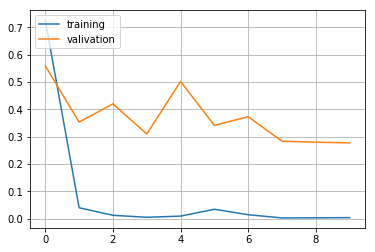

In [90]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'valivation'], loc='upper left')
plt.grid()
plt.show()

In [91]:
model.evaluate(x_test, y_test)

12630/12630 [==============================] - 1s 69us/sample - loss: 0.2656 - accuracy: 0.9390


[0.26558631009887534, 0.9389549]